## Estimation of Obesity Levels Based on Eating Habits and Physical Condition  

**Project Description:**
Analyze the dataset containing health and dietary information from individuals in Mexico, Peru, and Colombia. The goal is to estimate obesity levels based on physical condition and eating habits using Python for Data Science. Interns will learn to apply data cleaning,
exploratory data analysis (EDA), advanced visualizations, and machine learning techniques to predict obesity levels.

[Dataset Source](https://drive.google.com/file/d/1q21Y2_XVvxPpIVANtGzxpHwH2JLpiQLR/view?usp=sharing) Data Source : CC BY 4.0 | UCI Archive

Dataset Description:
This dataset includes data to estimate obesity levels, with 17 attributes and 2111 records. The records
are labeled with a class variable NObeyesdad (Obesity Level), which categorizes individuals into
several obesity levels:
 - Insufficient Weight
 - Normal Weight
 - Overweight Level I
 - Overweight Level II
 - Obesity Type I
 - Obesity Type II

In [2]:
# importing dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [3]:
## Week 1: Data Importing and Cleaning

# Load the dataset
data = pd.read_csv("C:\\Users\\Simeon\\Downloads\\ObesityDataSet_raw_and_data_sinthetic.csv")

# Inspect the structure
print("Dataset Information:")
data.info()

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Display the first few rows
print("\nSample Data:\n", data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF          

In [4]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
# Outlier detection and capping function
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply outlier capping
columns_with_outliers = ['Age', 'Height', 'Weight', 'TUE']
for col in columns_with_outliers:
    cap_outliers(data, col)

# Normalize continuous variables
scaler = MinMaxScaler()
continuous_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

print("\nData after normalization and encoding (Sample):\n", data.head())


Data after normalization and encoding (Sample):
    Gender       Age    Height    Weight family_history_with_overweight FAVC  \
0  Female  0.332081  0.323096  0.190307                            yes   no   
1  Female  0.332081  0.133039  0.129409                            yes   no   
2    Male  0.426961  0.665197  0.289267                            yes   no   
3    Male  0.616721  0.665197  0.365389                             no   no   
4    Male  0.379521  0.627186  0.386704                             no   no   

   FCVC       NCP       CAEC SMOKE  CH2O  SCC       FAF  TUE        CALC  \
0   0.5  0.666667  Sometimes    no   0.5   no  0.000000  0.5          no   
1   1.0  0.666667  Sometimes   yes   1.0  yes  1.000000  0.0   Sometimes   
2   0.5  0.666667  Sometimes    no   0.5   no  0.666667  0.5  Frequently   
3   1.0  0.666667  Sometimes    no   0.5   no  0.666667  0.0  Frequently   
4   0.5  0.000000  Sometimes    no   0.5   no  0.000000  0.0   Sometimes   

                  


Summary Statistics:
                Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.470145     0.478325     0.362229     0.709522     0.561876   
std       0.250362     0.177321     0.199344     0.266963     0.259346   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.282135     0.342101     0.201522     0.500000     0.552913   
50%       0.416424     0.476089     0.334940     0.692751     0.666667   
75%       0.569281     0.605261     0.520913     1.000000     0.666667   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      0.504006     0.336766     0.328933  
std       0.306477     0.283531     0.304464  
min       0.000000     0.000000     0.000000  
25%       0.292406     0.041502     0.000000  
50%       0.500000     0.3333

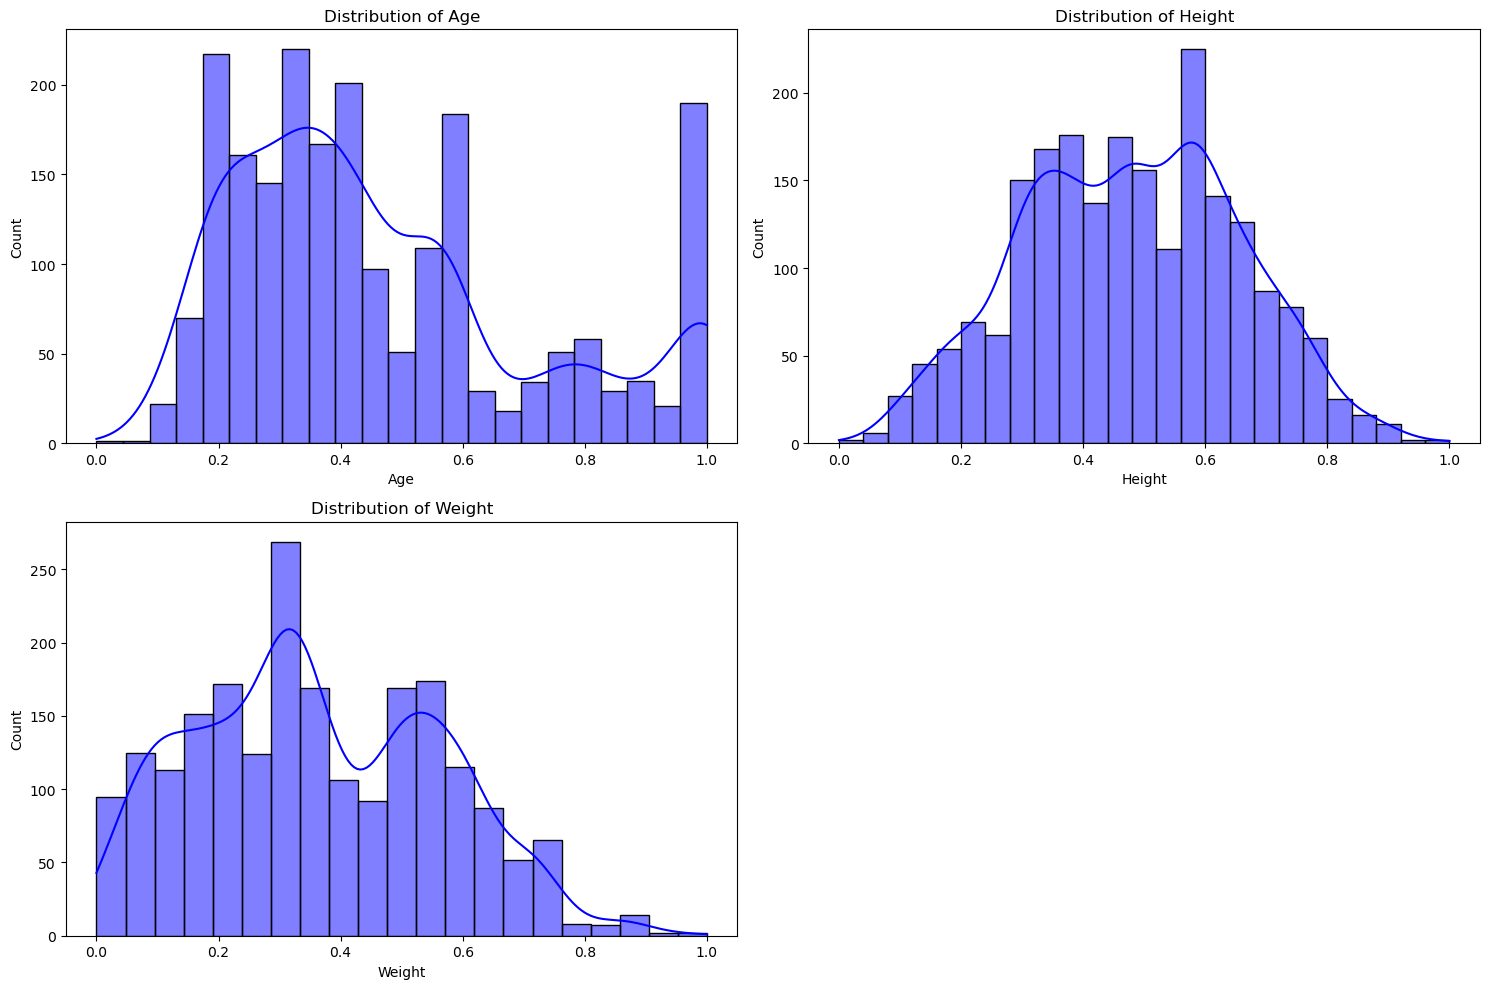

In [6]:
# Week 2: Exploratory Data Analysis (EDA)

# Summary statistics
print("\nSummary Statistics:\n", data.describe())

# Histograms and KDE plots for distribution analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'Height', 'Weight'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


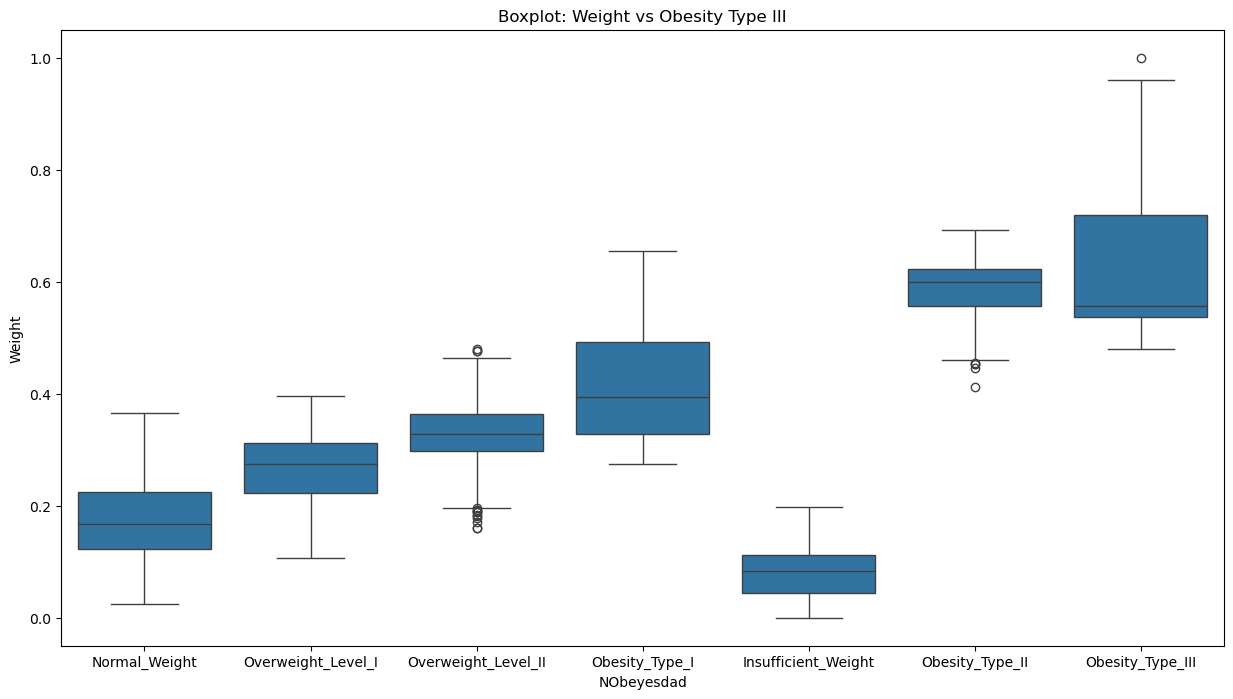

In [7]:
# Relationship exploration with boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(x='NObeyesdad', y='Weight', data=data)
plt.title('Boxplot: Weight vs Obesity Type III')
plt.show()


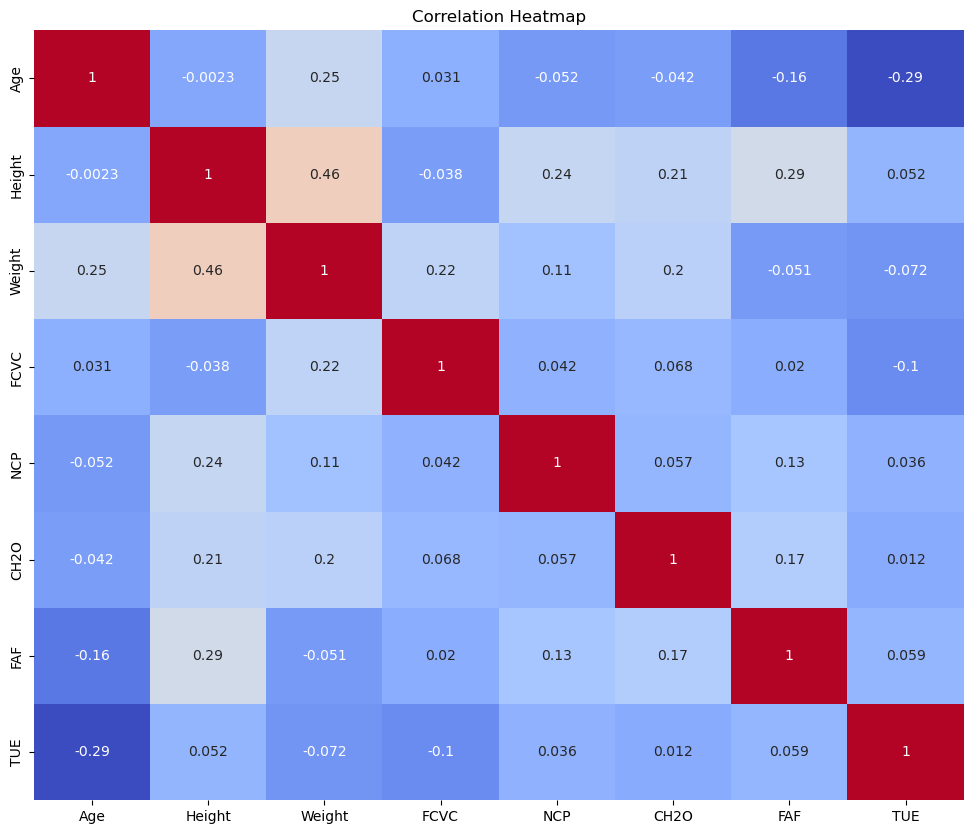

In [8]:
# Correlation analysis heatmap
correlation_matrix = data[continuous_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',cbar = False)
plt.title('Correlation Heatmap')
plt.show()


In [9]:
# Featuring Encoding 
# Label encode binary variables
cat_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC','MTRANS','CAEC','CALC', 'NObeyesdad']
label_encoder = LabelEncoder()
for col in cat_columns:
    data[col] = label_encoder.fit_transform(data[col])  


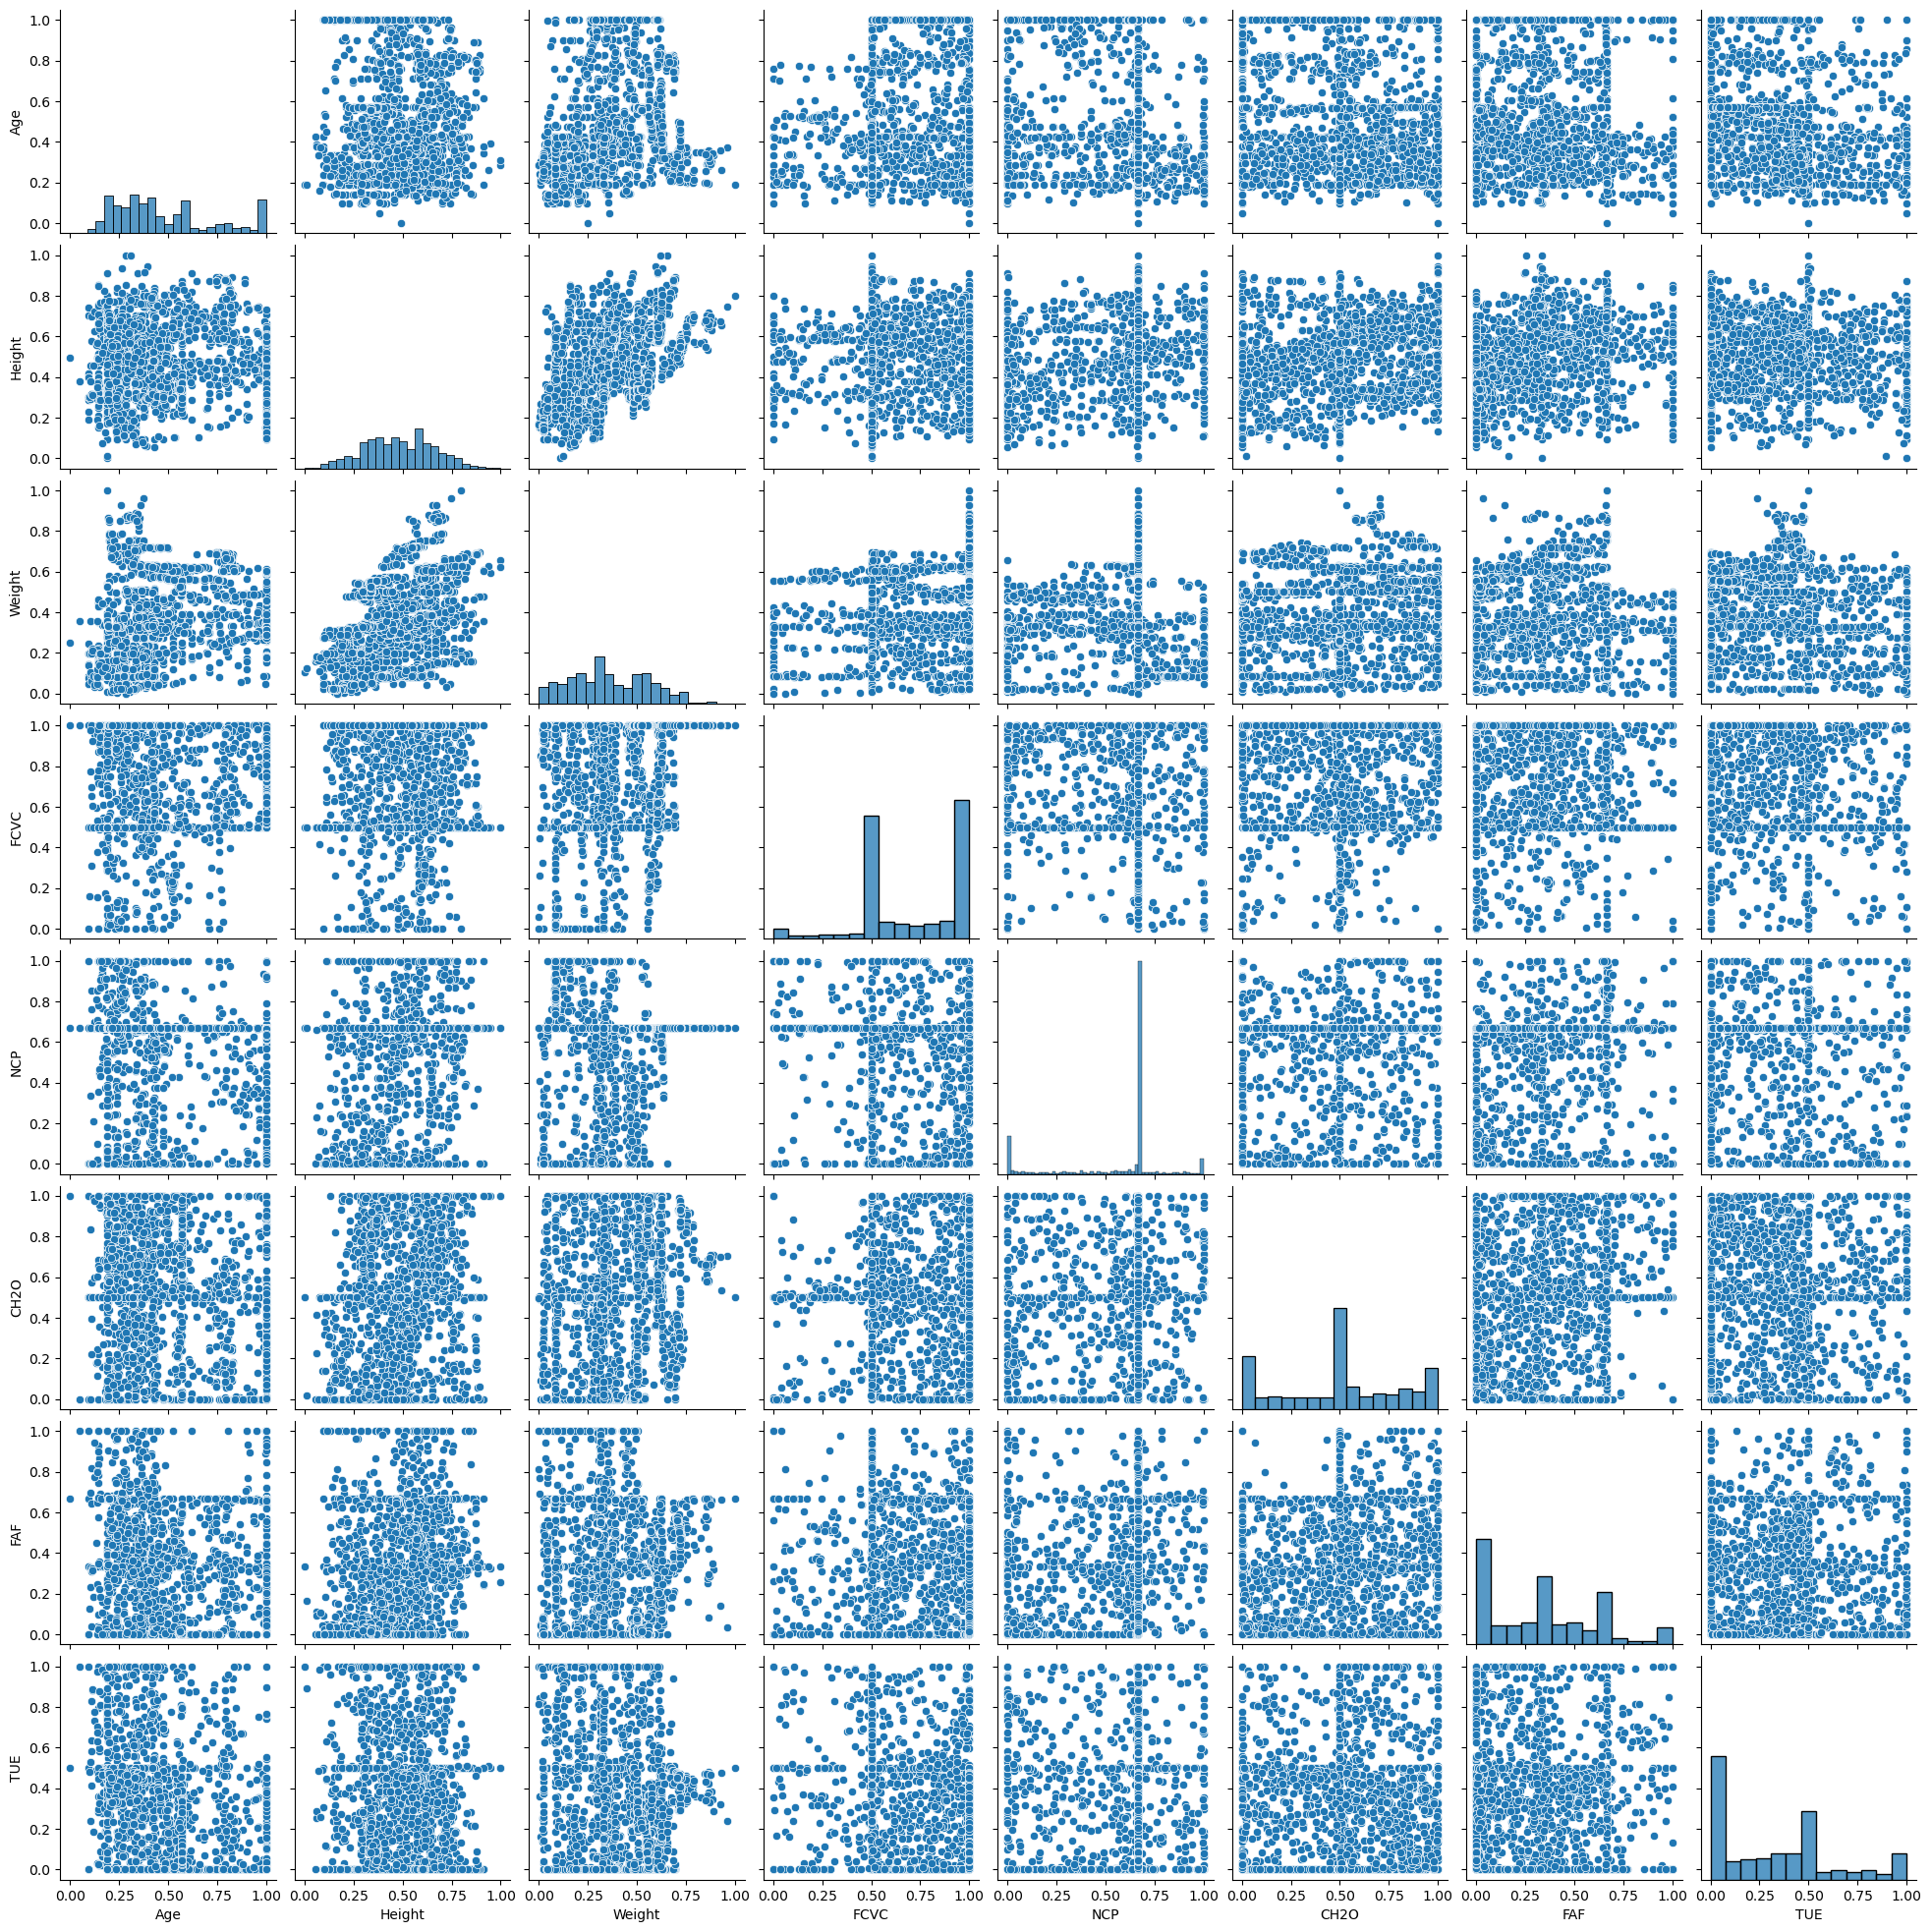

In [10]:
# Week 3: Advanced Visualizations and Machine Learning

# Pairplot
sns.pairplot(data[continuous_columns])
plt.show()


In [11]:
# Train-test split
X = data.drop(columns=['NObeyesdad'])  # Replace with the target class
y = data['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Train Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

In [12]:
X['CALC']

0       3
1       2
2       1
3       1
4       2
       ..
2106    2
2107    2
2108    2
2109    2
2110    2
Name: CALC, Length: 2111, dtype: int32

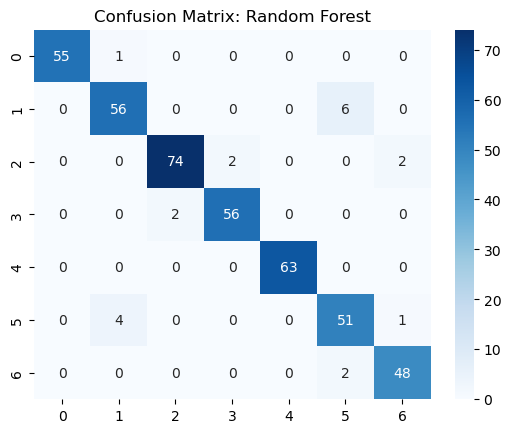

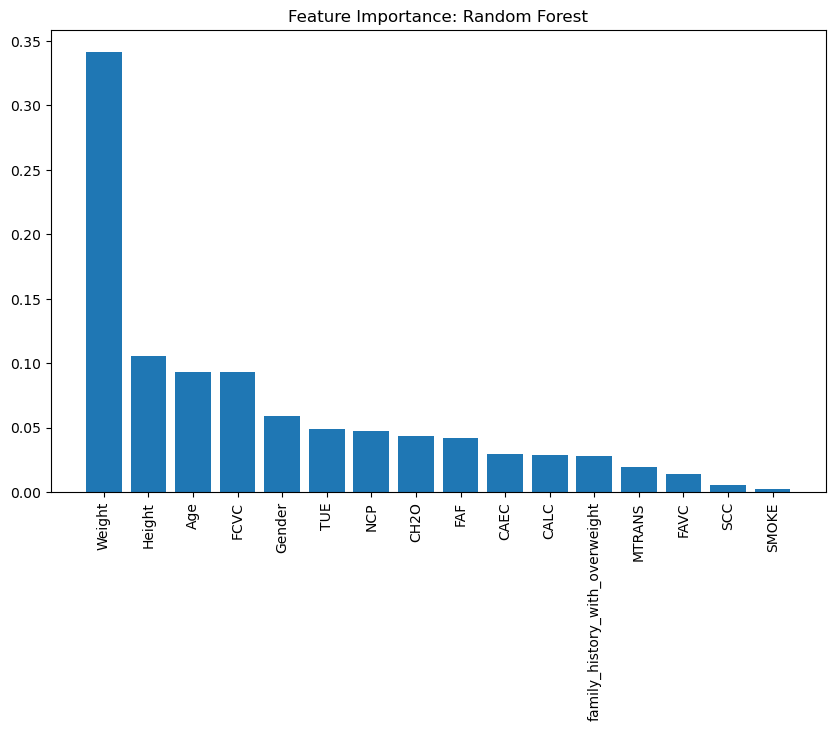

In [13]:
# Confusion matrix and feature importance
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Random Forest')
plt.show()

# Feature importance plot
importance = random_forest_model.feature_importances_
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importance[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importance: Random Forest')
plt.show()

In [35]:
# Week 4: Model Evaluation and Reporting

# Model evaluation using classification metrics
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logistic))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Documentation summary
report = """
Project Report:

1. Dataset Description:
   - Dataset contains 17 attributes and 2111 records to estimate obesity levels.

2. Data Preprocessing:
   - Encoded categorical variables.
   - Handled outliers using the IQR method.
   - Normalized continuous features.

3. Exploratory Data Analysis (EDA):
   - Distribution and relationship analysis performed.
   - Identified correlations between variables.

4. Machine Learning:
   - Implemented Logistic Regression and Random Forest models.
   - Random Forest outperformed Logistic Regression based on accuracy and F1-score.

5. Insights:
   - Physical activity and food consumption patterns strongly influence obesity levels.
   - Weight and family history are highly predictive of obesity.

"""


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81        56
           1       0.68      0.34      0.45        62
           2       0.73      0.72      0.72        78
           3       0.74      0.95      0.83        58
           4       0.97      1.00      0.98        63
           5       0.65      0.62      0.64        56
           6       0.48      0.48      0.48        50

    accuracy                           0.72       423
   macro avg       0.71      0.72      0.70       423
weighted avg       0.72      0.72      0.71       423

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.92      0.90      0.91        62
           2       0.97      0.95      0.96        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.86   

In [37]:
print(report)


Project Report:

1. Dataset Description:
   - Dataset contains 17 attributes and 2111 records to estimate obesity levels.

2. Data Preprocessing:
   - Encoded categorical variables.
   - Handled outliers using the IQR method.
   - Normalized continuous features.

3. Exploratory Data Analysis (EDA):
   - Distribution and relationship analysis performed.
   - Identified correlations between variables.

4. Machine Learning:
   - Implemented Logistic Regression and Random Forest models.
   - Random Forest outperformed Logistic Regression based on accuracy and F1-score.

5. Insights:
   - Physical activity and food consumption patterns strongly influence obesity levels.
   - Weight and family history are highly predictive of obesity.


